In [ ]:
Answer 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings

In [2]:
# Suppress warnings if you know the operation is safe
warnings.filterwarnings('ignore')

# Load the dataset
confirmed_cases = pd.read_csv('time_series_covid19_confirmed_US.csv')

# Sum the cases across all regions for each date to get the total cases per day in the US
total_cases_per_day = confirmed_cases.iloc[:, 11:].sum()

# Convert the index to datetime
total_cases_per_day.index = pd.to_datetime(total_cases_per_day.index)

In [3]:
# Calculate daily increases
daily_increases = total_cases_per_day.diff().dropna()

# Calculate the mean and standard deviation of daily increases
mean_increase = daily_increases.mean()
std_increase = daily_increases.std()

# Identify outliers where the increase is more than two standard deviations from the mean
outliers = daily_increases[(daily_increases > mean_increase + 2 * std_increase) | (daily_increases < mean_increase - 2 * std_increase)]

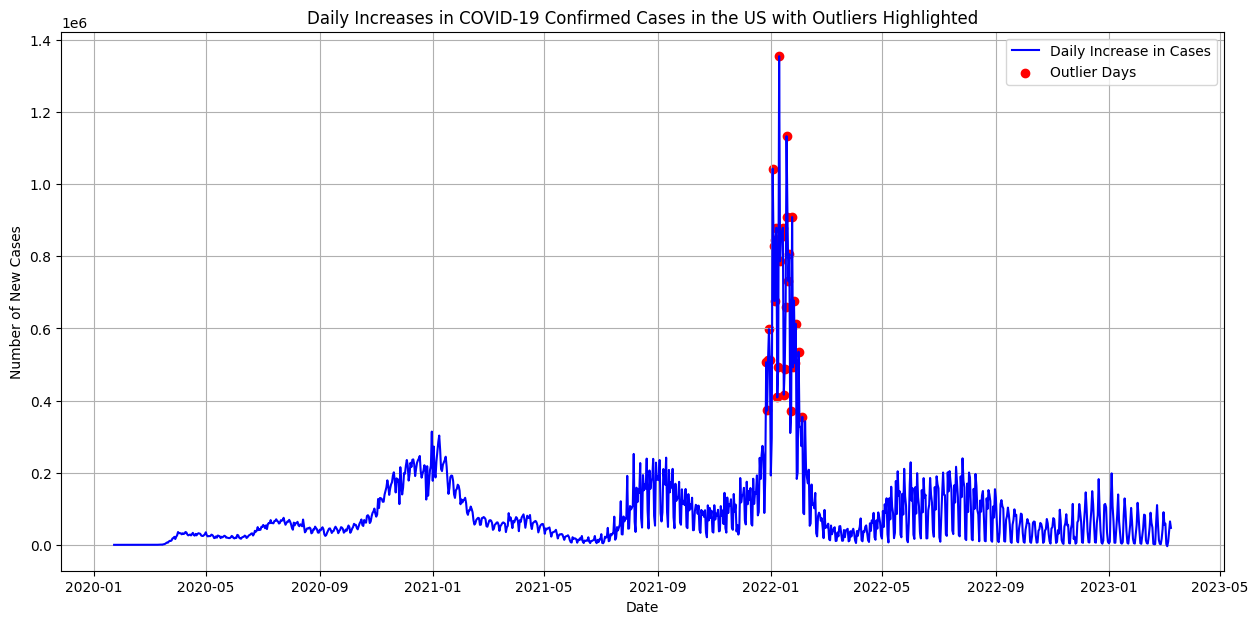

In [4]:
# Plotting the results
plt.figure(figsize=(15, 7))
plt.plot(total_cases_per_day.index[1:], daily_increases, label='Daily Increase in Cases', color='blue')
plt.scatter(outliers.index, outliers, color='red', label='Outlier Days')
plt.title('Daily Increases in COVID-19 Confirmed Cases in the US with Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
With the help of this visualization, one can identify odd spikes or falls in the daily case counts, which could point to noteworthy incidents or 
reporting irregularities. Viewers can monitor COVID-19 transmission trends and evaluate the long-term effects of different conditions on case counts.
The daily rise in confirmed cases over time is seen by the blue line. The number of new cases reported on a given date is represented by each point 
on the line.

Red spots on the plot indicate outlier days, or instances when the rise in cases is noticeably different from the norm. If the increase deviates 
more than two standard deviations from the mean increase, these outlier points are recognized.

Headline and Labels: The graph is entitled Daily Increases in COVID-19 Confirmed Cases in the US with Outliers Highlighted. The date is shown 
on the x-axis, while the number of new instances is shown on the y-axis.

Legend: By differentiating between the daily rise in cases and outlier days, the legend offers a key to understanding the plot.

Gridlines: To help with accurately reading and interpreting the chart, gridlines are added.
